In [2]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np

In [16]:
df = pd.read_csv('./report/NO_OS/histology/data.csv')
print(df.head())

   Age at Operation  Gender  Days Abdominal Pain  Temperature  Tenderness   
0                15       1                    1         36.9           1  \
1                14       0                    2         37.0           1   
2                16       0                    0         36.9           0   
3                14       0                    1         35.7           0   
4                16       1                    7         37.9           1   

   Leukos [10^9/l]  CRP [mg/l]  No of Sonographies  Diameter Appendix [mm]   
0            11.10         6.0                 1.0                     8.0  \
1            21.28        30.8                 1.0                    10.0   
2            13.07         1.9                 1.0                     8.0   
3             7.95         0.0                 2.0                     4.0   
4            14.82        14.4                 3.0                     8.0   

   Histology  
0          1  
1          2  
2          1  
3       

In [17]:
# df = df.drop(columns=['Month operation', 'Year operation', 'MRT No', 'CT No', 'RTG No', 'COVID', 'Type of Surgery', 'Tenderness in RLQ'])
# df = df.drop(columns=['Type of Surgery'])
df['Age at Operation'] = pd.to_numeric(df['Age at Operation'], errors='coerce')
df['Days Abdominal Pain'] = pd.to_numeric(df['Days Abdominal Pain'], errors='coerce')
df['Temperature'] = pd.to_numeric(df['Temperature'], errors='coerce')
df['Leukos [10^9/l]'] = pd.to_numeric(df['Leukos [10^9/l]'], errors='coerce')
df['CRP [mg/l]'] = pd.to_numeric(df['CRP [mg/l]'], errors='coerce')
df['No of Sonographies'] = pd.to_numeric(df['No of Sonographies'], errors='coerce')
df['Diameter Appendix [mm]'] = pd.to_numeric(df['Diameter Appendix [mm]'], errors='coerce')
# df = df.loc[df['Postoperative Diagnosis'].isin(['simple', 'complex', 'complex and abscess', 'perforated', 'gangranos'])]
# df['RTG No'] = df['RTG No'].fillna(0)
# df.loc[~df['COVID'].isin(['positive', 'negative']), 'COVID'] = 'negative'

In [18]:
df[df.isna().any(axis=1)]

,Age at Operation,Gender,Days Abdominal Pain,Temperature,Tenderness,Leukos [10^9/l],CRP [mg/l],No of Sonographies,Diameter Appendix [mm],Histology


In [19]:
print(df.shape)
df = df.dropna()
print(df.shape)

(696, 10)
(696, 10)


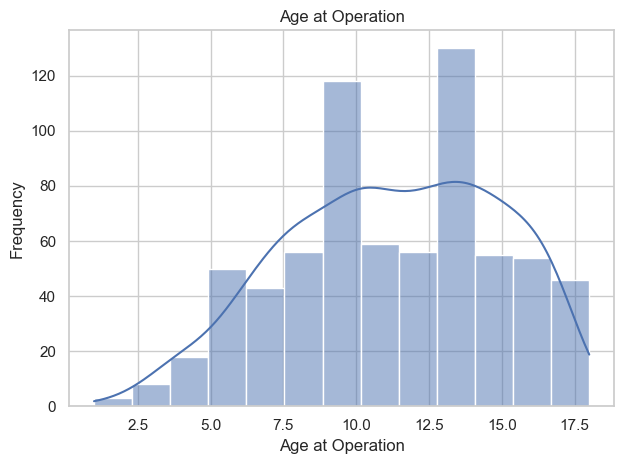

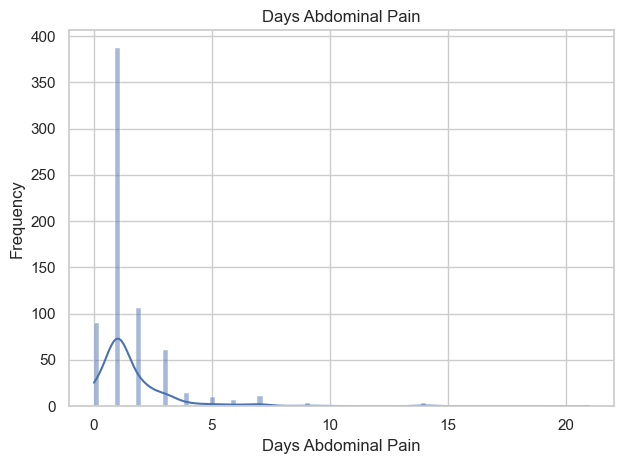

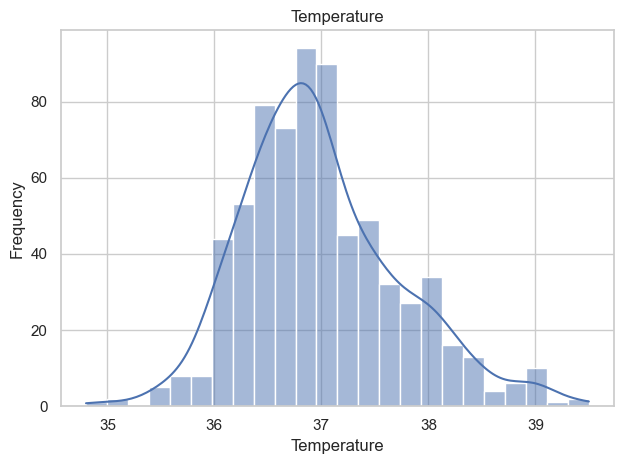

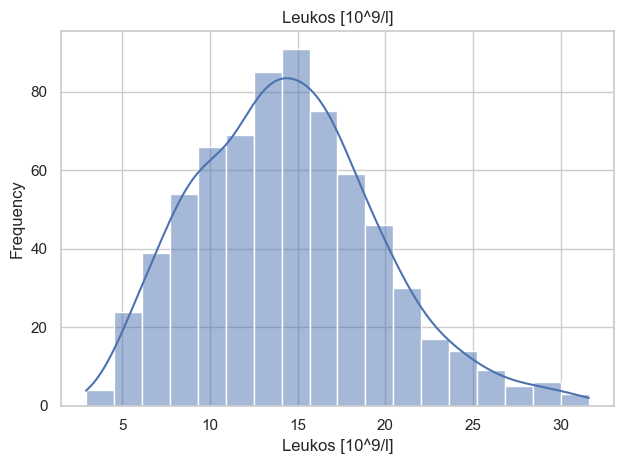

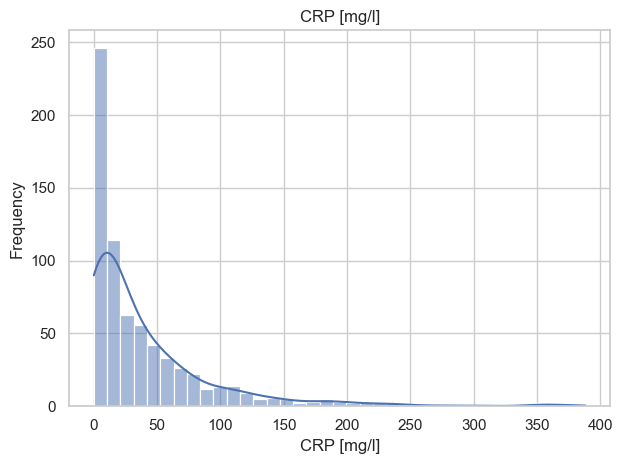

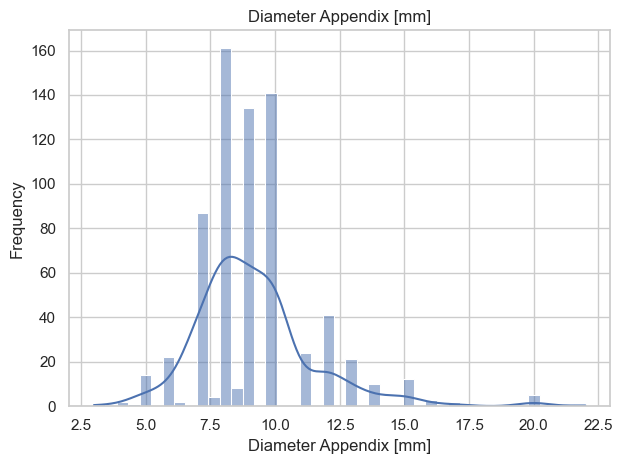

   Histology  Histology Binary  Postoperative Diagnosis   
0          1                 1                      0.0  \
1          2                 1                      1.0   
2          1                 1                      0.0   
3          0                 0                      0.0   
4          1                 1                      0.0   

   Postoperative Diagnosis  Gender  Tenderness  No of Sonographies  
0                      0.0       1           1                 1.0  
1                      1.0       0           1                 1.0  
2                      0.0       0           0                 1.0  
3                      0.0       0           0                 2.0  
4                      0.0       1           1                 3.0  


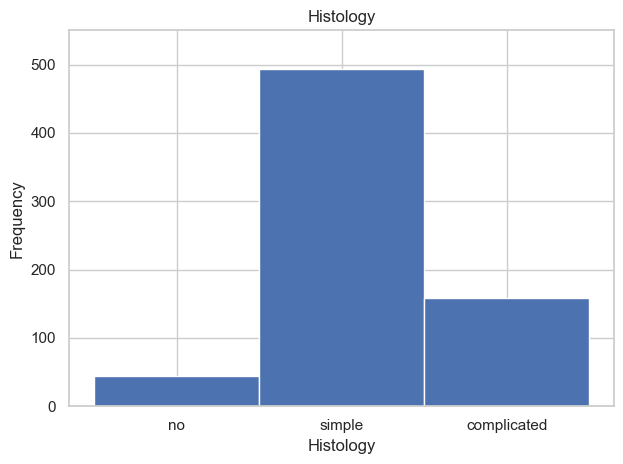

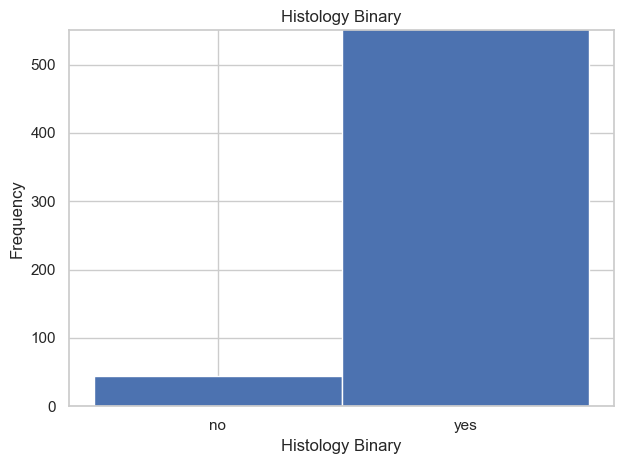

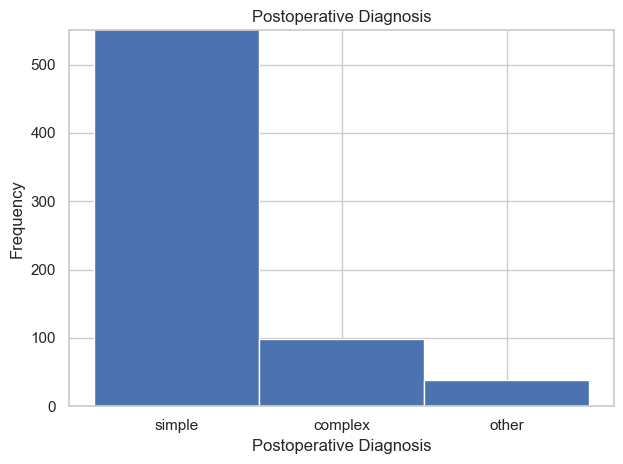

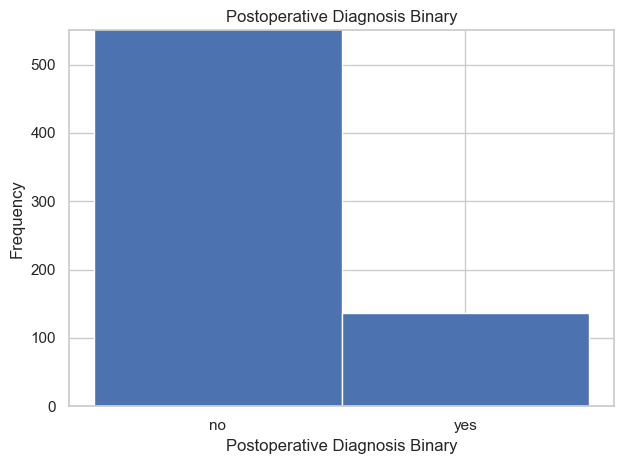

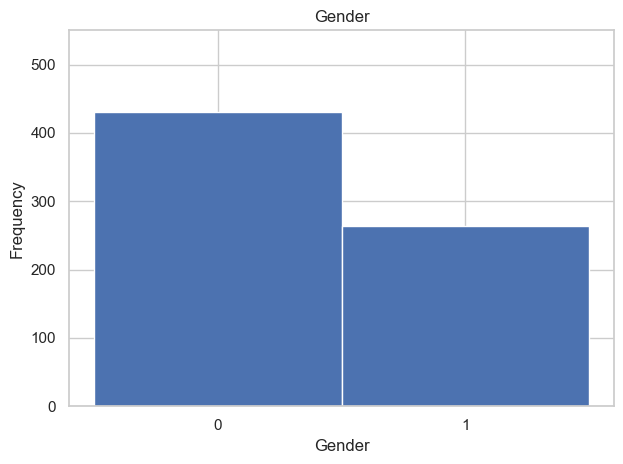

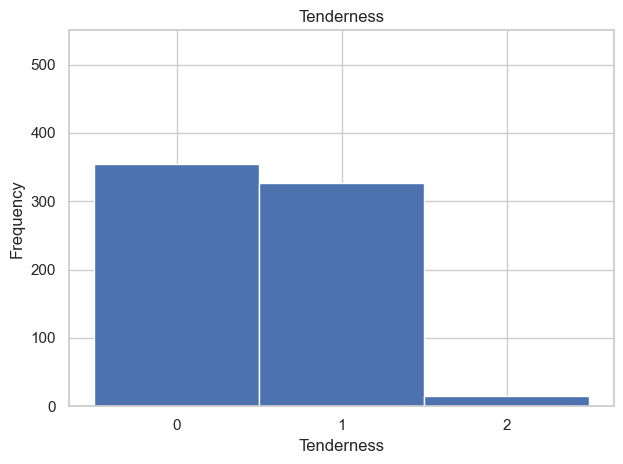

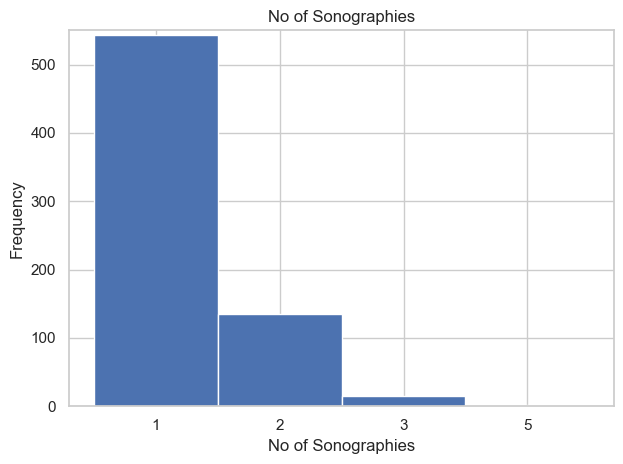

In [52]:
# Set up Seaborn for better styling
sn.set(style="whitegrid", font="Arial")

for column in df.columns[:-1]:
    if column == 'Gender' or column == 'No of Sonographies' or column == 'Tenderness':
        continue
    plt.figure()
    sn.histplot(df[column], kde=True)
    plt.title(column)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

xticks  = [['no', 'simple', 'complicated'], ['no', 'yes'],
           ['simple', 'complex', 'other'], ['no', 'yes'],
           None, None, None]
titles = ['Histology', 'Histology Binary', 'Postoperative Diagnosis',
        'Postoperative Diagnosis Binary', 'Gender', 'Tenderness', 'No of Sonographies']

data_paths = ['./report/NO_OS/histology/data.csv',
              './report/NO_OS/histology_binary/data.csv',
              './report/NO_OS/postop/data.csv',
              './report/NO_OS/postop_binary/data.csv']

dfs = pd.concat([pd.read_csv(path).iloc[:, -1] for path in data_paths], axis=1)
dfs = pd.concat([
    dfs,
    pd.read_csv(data_paths[0]).iloc[:, 1],
    pd.read_csv(data_paths[0]).iloc[:, 4],
    pd.read_csv(data_paths[0]).iloc[:, 7]
    ], axis=1).dropna()
print(dfs.head())
datanpy = dfs.to_numpy()

for i in range(len(datanpy[0])):
    plt.figure()
    
    num_bins = len(np.unique(datanpy[:, i]))
    hist_values, bin_edges, _ = plt.hist(datanpy[:, i], bins=num_bins)
    bin_centers = [(bin_edges[i] + bin_edges[i + 1]) / 2 for i in range(num_bins)]
    
    plt.xticks(bin_centers, xticks[i] if xticks[i] is not None else np.unique(datanpy[:, i]).astype(int))
    
    plt.title(titles[i])
    plt.ylabel('Frequency')
    plt.xlabel(titles[i])
    
    plt.ylim(top=550)
    plt.tight_layout()
    
    plt.show()

In [6]:
df.head()

,Age at Operation,Gender,Days Abdominal Pain,Temperature,Tenderness,Leukos [10^9/l],CRP [mg/l],No of Sonographies,Diameter Appendix [mm],Postoperative Diagnosis
0,15,female,1,36.9,none,11.10,6.0,1.0,8.0,simple
1,14,male,2,37.0,none,21.28,30.8,1.0,10.0,complex
2,16,male,0,36.9,local,13.07,1.9,1.0,8.0,simple
3,14,male,1,35.7,local,7.95,0.0,2.0,4.0,simple
4,16,female,7,37.9,none,14.82,14.4,3.0,8.0,simple


In [7]:
print(df.dtypes)

Age at Operation             int64
Gender                      object
Days Abdominal Pain          int64
Temperature                float64
Tenderness                  object
Leukos [10^9/l]            float64
CRP [mg/l]                 float64
No of Sonographies         float64
Diameter Appendix [mm]     float64
Postoperative Diagnosis     object
dtype: object


In [8]:
for col_name in df.columns:
    if df[col_name].dtype == 'object':
        print(df[col_name].value_counts())

male      431
female    264
Name: Gender, dtype: int64
local      353
none       327
diffuse     15
Name: Tenderness, dtype: int64
simple                 558
complex                 68
complex and abscess     30
perforated              27
gangranos               12
Name: Postoperative Diagnosis, dtype: int64


In [9]:
from sklearn.preprocessing import MinMaxScaler

def export_norm(df, filename, columns_to_normalize):
    df_norm = df.copy()

    # Get the numeric columns
    # numeric_columns = df_norm.select_dtypes(include=['float64', 'int64']).iloc[:, :-1].columns
    # columns_to_normalize = [0, 2, 3, 5, 6, 7]

    scaler = MinMaxScaler()
    # df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
    df_norm.iloc[:, columns_to_normalize] = scaler.fit_transform(df_norm.iloc[:, columns_to_normalize])

    df_norm.to_csv(f'{filename}', index=False)
    print(df_norm.head())

In [11]:
# to_export = df.copy()

# # Histology No, Yes
# encoding_values = {
#     'Gender':
#         {'male': 0, 'female': 1},
#     'Tenderness':
#         {'none': 0, 'local': 1, 'diffuse': 2},
#     'Type of Surgery':
#         {'open': 0, 'laparoscopy': 1, 'conversion': 2},
#     'Histology Binary':
#         {'no': 0, 'yes': 1}
# }

# to_export = to_export.replace(encoding_values)
# to_export.to_csv('./final/histology_binary.csv', index=False)
# to_export.head()

# export_norm(to_export, './final/histology_binary_norm.csv', [0, 2, 3, 5, 6, 7, 8])

   Age at Operation  Gender  Days Abdominal Pain  Temperature  Tenderness  \
0          0.823529       1             0.047619     0.446809           1   
1          0.764706       0             0.095238     0.468085           1   
2          0.882353       0             0.000000     0.446809           0   
3          0.764706       0             0.047619     0.191489           0   
4          0.882353       1             0.333333     0.659574           1   

   Leukos [10^9/l]  CRP [mg/l]  No of Sonographies  Diameter Appendix [mm]  \
0         0.284967    0.015456                0.00                0.263158   
1         0.640042    0.079341                0.00                0.368421   
2         0.353680    0.004894                0.00                0.263158   
3         0.175096    0.000000                0.25                0.052632   
4         0.414719    0.037094                0.50                0.263158   

   Type of Surgery  Histology Binary  
0                0           

In [15]:
# to_export = df.copy()

# # Histology No, Simple, Complicated
# encoding_values = {
#     'Gender':
#         {'male': 0, 'female': 1},
#     'Tenderness':
#         {'none': 0, 'local': 1, 'diffuse': 2},
#     'Type of Surgery':
#         {'open': 0, 'laparoscopy': 1, 'conversion': 2},
#     'Histology':
#         {'no': 0, 'simple': 1, 'complicated': 2}
# }

# to_export = to_export.replace(encoding_values)
# to_export.to_csv('./final/histology_multiclass.csv', index=False)
# to_export.head()

# export_norm(to_export, './final/histology_multiclass_norm.csv', [0, 2, 3, 5, 6, 7, 8])

   Age at Operation  Gender  Days Abdominal Pain  Temperature  Tenderness  \
0          0.823529       1             0.047619     0.446809           1   
1          0.764706       0             0.095238     0.468085           1   
2          0.882353       0             0.000000     0.446809           0   
3          0.764706       0             0.047619     0.191489           0   
4          0.882353       1             0.333333     0.659574           1   

   Leukos [10^9/l]  CRP [mg/l]  No of Sonographies  Diameter Appendix [mm]  \
0         0.284967    0.015456                0.00                0.263158   
1         0.640042    0.079341                0.00                0.368421   
2         0.353680    0.004894                0.00                0.263158   
3         0.175096    0.000000                0.25                0.052632   
4         0.414719    0.037094                0.50                0.263158   

   Type of Surgery  Histology  
0                0          1  
1   

In [10]:
# to_export = df.copy()

# # Simple, Complex
# encoding_values = {
#     'Gender':
#         {'male': 0, 'female': 1},
#     'Tenderness':
#         {'none': 0, 'local': 1, 'diffuse': 2},
#     'Type of Surgery':
#         {'open': 0, 'laparoscopy': 1, 'conversion': 2},
#     'Postoperative Diagnosis':
#         {'simple': 0, 'complex': 1, 'complex and abscess': 1, 'perforated': 1, 'gangranos': 1}
# }

# to_export = to_export.replace(encoding_values)
# to_export.to_csv('./final/postop_binary.csv', index=False)
# to_export.head()

# export_norm(to_export, './final/postop_binary_norm.csv', [0, 2, 3, 5, 6, 7, 8])

   Age at Operation  Gender  Days Abdominal Pain  Temperature  Tenderness  \
0          0.823529       1             0.047619     0.446809           0   
1          0.764706       0             0.095238     0.468085           0   
2          0.882353       0             0.000000     0.446809           1   
3          0.764706       0             0.047619     0.191489           1   
4          0.882353       1             0.333333     0.659574           0   

   Leukos [10^9/l]  CRP [mg/l]  No of Sonographies  Diameter Appendix [mm]  \
0         0.284967    0.015456                0.00                0.263158   
1         0.640042    0.079341                0.00                0.368421   
2         0.353680    0.004894                0.00                0.263158   
3         0.175096    0.000000                0.25                0.052632   
4         0.414719    0.037094                0.50                0.263158   

   Postoperative Diagnosis  
0                        0  
1         

In [11]:
# to_export = df.copy()

# # Simple, Complex, Other
# encoding_values = {
#     'Gender':
#         {'male': 0, 'female': 1},
#     'Tenderness':
#         {'none': 0, 'local': 1, 'diffuse': 2},
#     'Type of Surgery':
#         {'open': 0, 'laparoscopy': 1, 'conversion': 2},
#     'Postoperative Diagnosis':
#         {'simple': 0, 'complex': 1, 'complex and abscess': 1, 'perforated': 2, 'gangranos': 2}
# }

# to_export = to_export.replace(encoding_values)
# to_export.to_csv('./final/postop_spl_cplx_othr.csv', index=False)
# to_export.head()

# export_norm(to_export, './final/postop_spl_cplx_othr_norm.csv', [0, 2, 3, 5, 6, 7, 8])

   Age at Operation  Gender  Days Abdominal Pain  Temperature  Tenderness  \
0          0.823529       1             0.047619     0.446809           0   
1          0.764706       0             0.095238     0.468085           0   
2          0.882353       0             0.000000     0.446809           1   
3          0.764706       0             0.047619     0.191489           1   
4          0.882353       1             0.333333     0.659574           0   

   Leukos [10^9/l]  CRP [mg/l]  No of Sonographies  Diameter Appendix [mm]  \
0         0.284967    0.015456                0.00                0.263158   
1         0.640042    0.079341                0.00                0.368421   
2         0.353680    0.004894                0.00                0.263158   
3         0.175096    0.000000                0.25                0.052632   
4         0.414719    0.037094                0.50                0.263158   

   Postoperative Diagnosis  
0                        0  
1         

In [12]:
# to_export = df.copy()

# # Simple, Complex, Complex and abscess, Perforated, Gangranos
# encoding_values = {
#     'Gender':
#         {'male': 0, 'female': 1},
#     'Tenderness':
#         {'none': 0, 'local': 1, 'diffuse': 2},
#     'Type of Surgery':
#         {'open': 0, 'laparoscopy': 1, 'conversion': 2},
#     'Postoperative Diagnosis':
#         {'simple': 0, 'complex': 1, 'complex and abscess': 2, 'perforated': 3, 'gangranos': 4}
# }

# to_export = to_export.replace(encoding_values)
# to_export.to_csv('./final/postop_multiclass.csv', index=False)
# print(to_export.head())

# export_norm(to_export, './final/postop_multiclass_norm.csv', [0, 2, 3, 5, 6, 7, 8])

   Age at Operation  Gender  Days Abdominal Pain  Temperature  Tenderness  \
0                15       1                    1         36.9           0   
1                14       0                    2         37.0           0   
2                16       0                    0         36.9           1   
3                14       0                    1         35.7           1   
4                16       1                    7         37.9           0   

   Leukos [10^9/l]  CRP [mg/l]  No of Sonographies  Diameter Appendix [mm]  \
0            11.10         6.0                 1.0                     8.0   
1            21.28        30.8                 1.0                    10.0   
2            13.07         1.9                 1.0                     8.0   
3             7.95         0.0                 2.0                     4.0   
4            14.82        14.4                 3.0                     8.0   

   Postoperative Diagnosis  
0                        0  
1         

In [16]:
to_export.head()

,Age at Operation,Gender,Days Abdominal Pain,Temperature,Tenderness,Leukos [10^9/l],CRP [mg/l],No of Sonographies,Diameter Appendix [mm],Postoperative Diagnosis
0,15,1,1,36.9,0,11.10,6.0,1.0,8.0,0
1,14,0,2,37.0,0,21.28,30.8,1.0,10.0,1
2,16,0,0,36.9,1,13.07,1.9,1.0,8.0,0
3,14,0,1,35.7,1,7.95,0.0,2.0,4.0,0
4,16,1,7,37.9,0,14.82,14.4,3.0,8.0,0


In [13]:
corr_matrix_pearson = to_export.corr(method='pearson')
corr_matrix_spearman = to_export.corr(method='spearman')

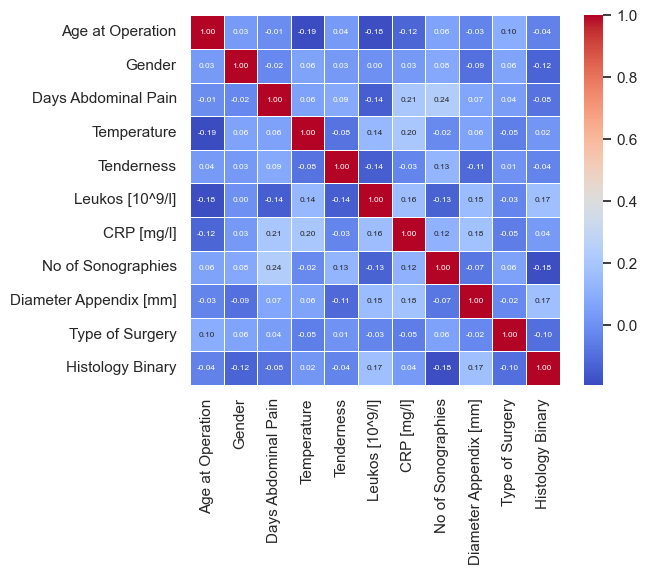

In [14]:
sn.heatmap(corr_matrix_pearson, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, square=True, annot_kws={"size": 6})
plt.show()

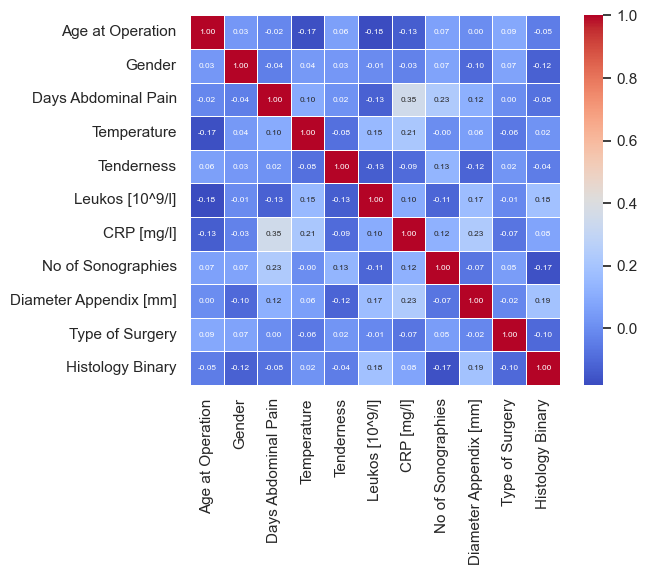

In [15]:
sn.heatmap(corr_matrix_spearman, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, square=True, annot_kws={"size": 6})
plt.show()

In [20]:
to_export.describe()

,Age at Operation,Gender,Days Abdominal Pain,Temperature,Tenderness,Leukos [10^9/l],CRP [mg/l],No of Sonographies,Diameter Appendix [mm],Type of Surgery,Histology
count,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000
mean,11.224138,0.380747,1.622126,36.989943,0.512931,14.444655,40.051739,1.250000,9.187500,0.158046,1.163793
std,3.659428,0.485920,1.868181,0.739521,0.541625,5.191807,54.906005,0.515236,2.310116,0.372846,0.513596
min,1.000000,0.000000,0.000000,34.800000,0.000000,2.930000,0.000000,1.000000,3.000000,0.000000,0.000000
25%,8.000000,0.000000,1.000000,36.500000,0.000000,10.515000,5.100000,1.000000,8.000000,0.000000,1.000000
50%,11.000000,0.000000,1.000000,36.900000,0.000000,14.205000,19.300000,1.000000,9.000000,0.000000,1.000000
75%,14.000000,1.000000,2.000000,37.400000,1.000000,17.627500,52.725000,1.000000,10.000000,0.000000,1.000000
max,18.000000,1.000000,21.000000,39.500000,2.000000,31.600000,388.200000,5.000000,22.000000,2.000000,2.000000


In [20]:
from scipy.stats import shapiro

for i in range(len(df.columns)):
    stat, p = shapiro(df.iloc[:, i])
    maybe = 'not ' if p <= 0.05 else ''
    print(f'{df.columns[i]} - stat={stat:.2f}, p={p:.2f} - probably {maybe} normal')
    

stat, p = shapiro(np.random.normal(size=100))
maybe = 'not ' if p <= 0.05 else ''
print(f'CHECK - stat={stat:.2f}, p={p:.2f} - probably {maybe} normal')

Age at Operation - stat=0.97, p=0.00 - probably not  normal


TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''